# "How do variations in precipitation patterns and soil characteristics influence landslide occurrences in Sitka, Alaska"


## Preliminary imports:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
mpl.rcParams.update({'mathtext.default': 'regular'})
mpl.rcParams.update({'lines.markeredgecolor': 'black'})
mpl.rcParams.update({'lines.markersize': 10})
import os
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.stats.outliers_influence import variance_inflation_factor
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Climate_Data'
os.chdir(data_path)
# these lines should return a bunch of .csv files
file_list = os.listdir()
print(len(file_list))
print(file_list)

5
['99717199999.csv', '99717199999 (1).csv', '99717199999 (2).csv', '99717199999 (3).csv', '99717199999 (4).csv']


In [ ]:
climate = pd.DataFrame()

# Loop through each file and append its data to the combined DataFrame
for i in range(len(file_list)):
    df = pd.read_csv(file_list[i])
    climate = climate.append(df, ignore_index=True)

<ipython-input-3-0497bca2f60c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate = climate.append(df, ignore_index=True)
<ipython-input-3-0497bca2f60c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate = climate.append(df, ignore_index=True)
<ipython-input-3-0497bca2f60c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate = climate.append(df, ignore_index=True)
<ipython-input-3-0497bca2f60c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate = climate.append(df, ignore_index=True)
<ipython-input-3-0497bca2f60c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [ ]:
geo_data = pd.read_csv('/content/drive/MyDrive/Alaska_Soil_Survey__USFS__.csv')
landslide_data = pd.read_csv('/content/drive/MyDrive/akSitka_5m.csv')

<ipython-input-4-b1f233e62871>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  landslide_data = pd.read_csv('/content/drive/MyDrive/akSitka_5m.csv')


## Data cleaning

In [ ]:
climate['DATE'] = pd.to_datetime(climate['DATE'])
start_date = '2019-09-18'
end_date = '2023-04-17'
climate_data = climate[(climate['DATE'] >= start_date) & (climate['DATE'] <= end_date)]
climate_data.reset_index(drop=True, inplace=True)
climate_data

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,99717199999,2019-09-18,57.052,-135.342,1.0,"SITKA, AK US",55.2,22,9999.9,0,...,999.9,999.9,62.1,*,49.3,*,0.0,I,999.9,0
1,99717199999,2019-09-19,57.052,-135.342,1.0,"SITKA, AK US",55.5,24,9999.9,0,...,999.9,999.9,60.1,*,53.4,*,0.0,I,999.9,0
2,99717199999,2019-09-20,57.052,-135.342,1.0,"SITKA, AK US",56.8,24,9999.9,0,...,999.9,999.9,60.8,*,54.0,*,0.0,I,999.9,0
3,99717199999,2019-09-21,57.052,-135.342,1.0,"SITKA, AK US",57.5,19,9999.9,0,...,999.9,999.9,61.7,*,54.0,*,0.0,I,999.9,0
4,99717199999,2019-09-22,57.052,-135.342,1.0,"SITKA, AK US",52.2,24,9999.9,0,...,999.9,999.9,58.1,*,47.7,*,0.0,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,99717199999,2023-04-13,57.052,-135.342,1.0,"SITKA, AK US",38.5,24,9999.9,0,...,999.9,999.9,41.5,*,34.7,*,0.0,I,999.9,0
1280,99717199999,2023-04-14,57.052,-135.342,1.0,"SITKA, AK US",40.2,24,9999.9,0,...,999.9,999.9,46.0,*,35.4,*,0.0,I,999.9,0
1281,99717199999,2023-04-15,57.052,-135.342,1.0,"SITKA, AK US",42.9,23,9999.9,0,...,999.9,999.9,45.0,*,41.7,*,0.0,I,999.9,0
1282,99717199999,2023-04-16,57.052,-135.342,1.0,"SITKA, AK US",42.1,24,9999.9,0,...,999.9,999.9,52.5,*,36.3,*,0.0,I,999.9,0


In [ ]:
# Convert timestamp columns to datetime format
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])
landslide_data['timestamp_utc'] = pd.to_datetime(landslide_data['timestamp_utc'])

# Merge climate_data and landslide_data based on the timestamp
merged_data = pd.merge(climate_data, landslide_data, left_on='DATE', right_on='timestamp_utc', how='inner')

<ipython-input-6-f2f372a4b8b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])


## EDA to help answer question

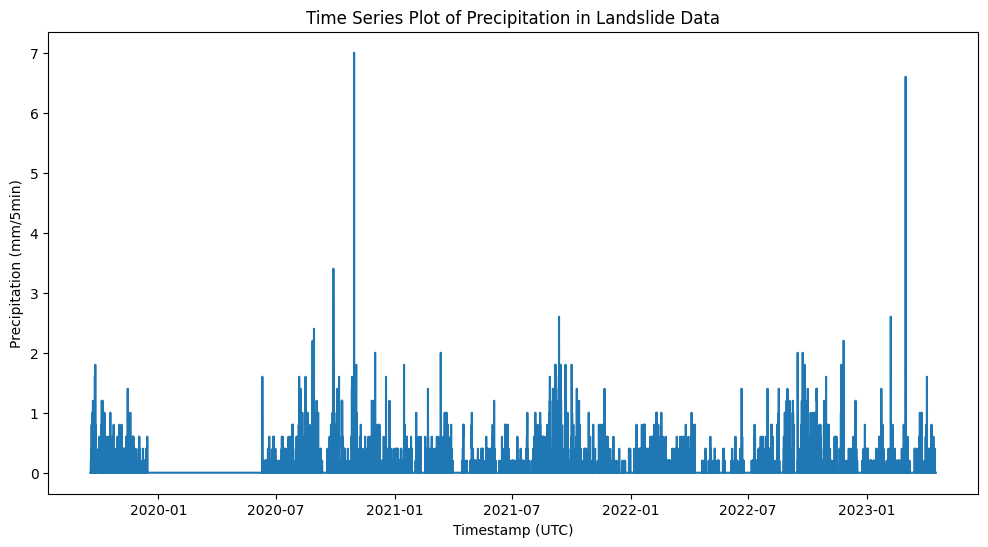

In [ ]:
# Example: Time series plot of precipitation in Landslide Data
plt.figure(figsize=(12, 6))
landslide_data['timestamp_utc'] = pd.to_datetime(landslide_data['timestamp_utc'])
sns.lineplot(x='timestamp_utc', y='precip_mm', data=landslide_data)
plt.title('Time Series Plot of Precipitation in Landslide Data')
plt.xlabel('Timestamp (UTC)')
plt.ylabel('Precipitation (mm/5min)')
plt.show()

<ipython-input-8-deafa6c3f8a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  landslide_corr = landslide_data.corr()


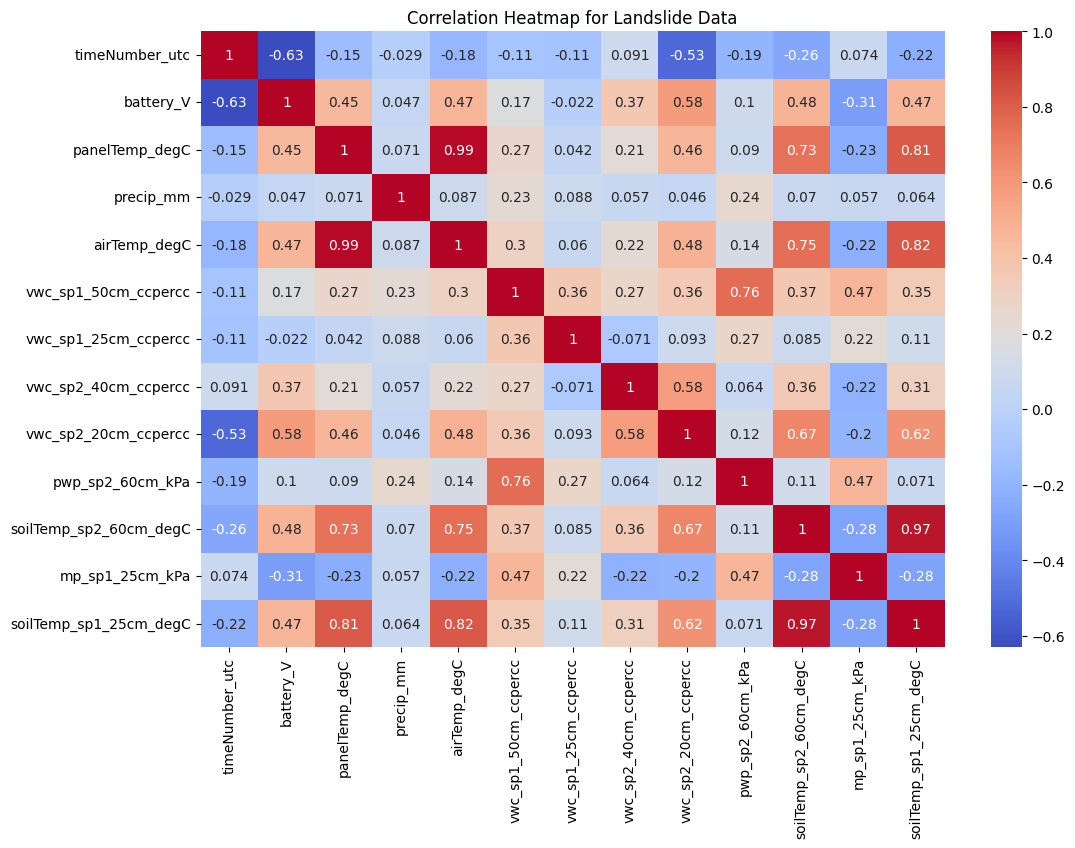

In [ ]:
# Example: Correlation Heatmap for Landslide Data
plt.figure(figsize=(12, 8))
landslide_corr = landslide_data.corr()
sns.heatmap(landslide_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for Landslide Data')
plt.show()

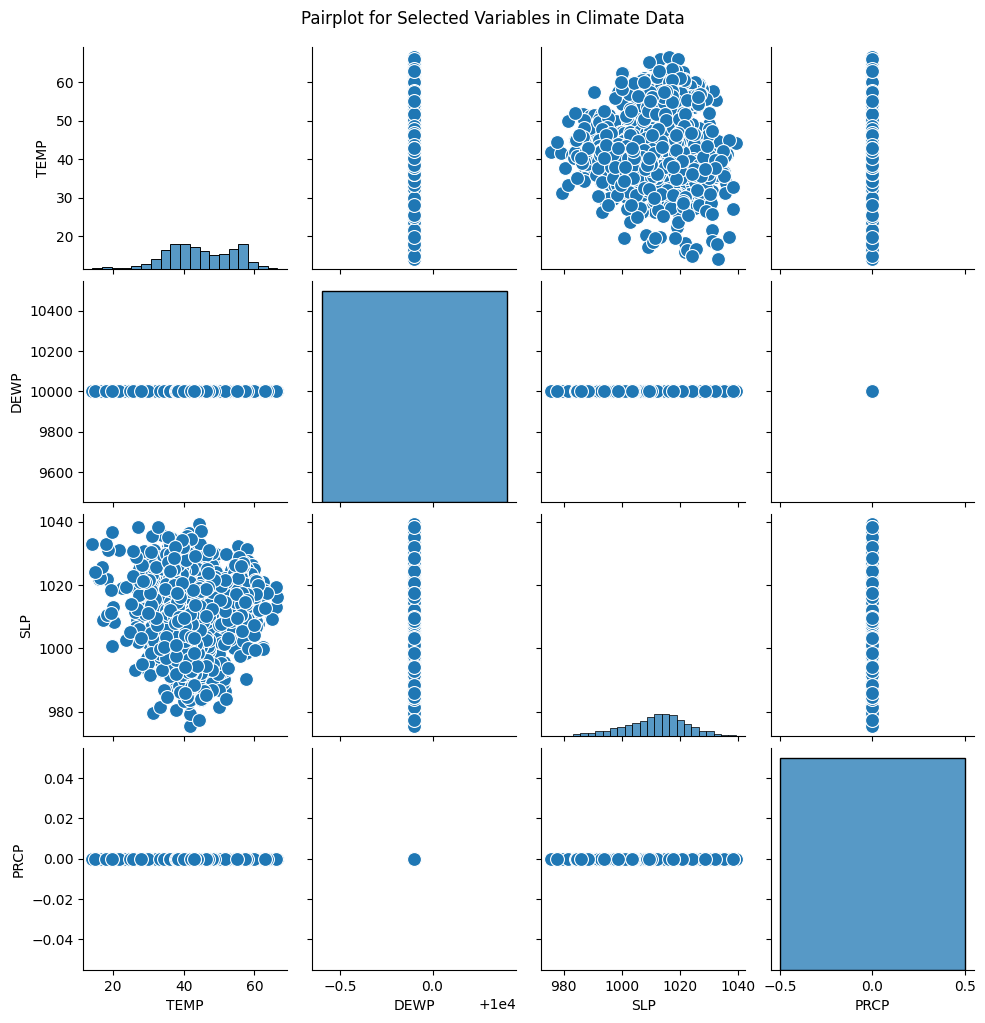

In [ ]:
# Example: Pairplot for selected variables in Climate Data
selected_climate_vars = ['TEMP', 'DEWP', 'SLP', 'PRCP']
sns.pairplot(climate_data[selected_climate_vars])
plt.suptitle('Pairplot for Selected Variables in Climate Data', y=1.02)
plt.show()

In [ ]:
merged_data['soilTemp_sp1_55cm_degC'] = pd.to_numeric(merged_data['soilTemp_sp1_55cm_degC'], errors='coerce')

In [ ]:
selected_columns = ['precip_mm', 'vwc_sp1_50cm_ccpercc', 'soilTemp_sp1_55cm_degC']

# Filter out rows with missing values in selected columns
regression_data = merged_data[selected_columns].dropna()

# Add a constant term to the independent variables (precipitation and soil characteristics)
X = sm.add_constant(regression_data[['precip_mm', 'vwc_sp1_50cm_ccpercc']])
y = regression_data['soilTemp_sp1_55cm_degC']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     soilTemp_sp1_55cm_degC   R-squared:                       0.135
Model:                                OLS   Adj. R-squared:                  0.133
Method:                     Least Squares   F-statistic:                     85.80
Date:                    Sat, 16 Dec 2023   Prob (F-statistic):           2.37e-35
Time:                            02:01:26   Log-Likelihood:                -2704.0
No. Observations:                    1102   AIC:                             5414.
Df Residuals:                        1099   BIC:                             5429.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Text(0, 0.5, 'Soil Temperature at 55cm (°C)')

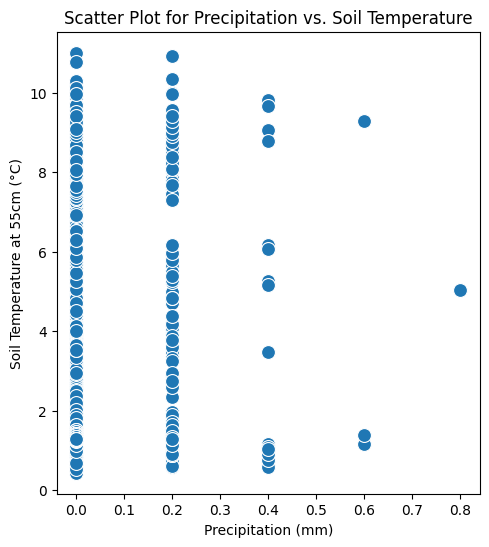

In [ ]:
# Scatter plot for precipitation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='precip_mm', y='soilTemp_sp1_55cm_degC', data=merged_data)
plt.title('Scatter Plot for Precipitation vs. Soil Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Soil Temperature at 55cm (°C)')


Text(0, 0.5, 'Soil Temperature at 55cm (°C)')

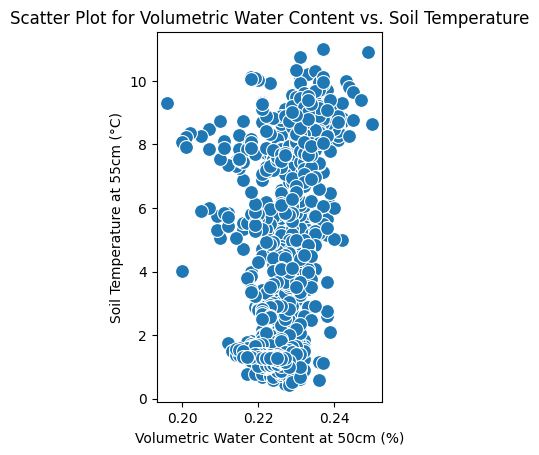

In [ ]:
# Scatter plot for volumetric water content
plt.subplot(1, 2, 2)
sns.scatterplot(x='vwc_sp1_50cm_ccpercc', y='soilTemp_sp1_55cm_degC', data=merged_data)
plt.title('Scatter Plot for Volumetric Water Content vs. Soil Temperature')
plt.xlabel('Volumetric Water Content at 50cm (%)')
plt.ylabel('Soil Temperature at 55cm (°C)')

The regression results indicate the relationship between the dependent variable 'soilTemp_sp1_55cm_degC' and the independent variables 'precip_mm' and 'vwc_sp1_50cm_ccpercc'. Here's a summary of the key information:

1. Overall Model Fit:

R-squared: This is a measure of how well the independent variables explain the variability in the dependent variable. In this case, the R-squared is 0.135, suggesting that about 13.5% of the variability in soilTemp_sp1_55cm_degC is explained by the variables included in the model.


2. Coefficient Interpretation:

i. const (Intercept): The intercept is -35.2910. In the context of this model, it represents the estimated value of soilTemp_sp1_55cm_degC when both precip_mm and vwc_sp1_50cm_ccpercc are zero. However, it may not have a practical interpretation in this context, as it might not make sense for precip_mm and vwc_sp1_50cm_ccpercc to be exactly zero.


ii. precip_mm: For each unit increase in precip_mm, the model predicts a decrease of approximately 2.7467 units in soilTemp_sp1_55cm_degC. The p-value (P>|t|) of 0.007 indicates that this variable is statistically significant.


iii. vwc_sp1_50cm_ccpercc: For each unit increase in vwc_sp1_50cm_ccpercc, the model predicts an increase of approximately 175.2273 units in soilTemp_sp1_55cm_degC. The p-value (P>|t|) is very close to zero, indicating that this variable is statistically significant.

3. Model Evaluation:

F-statistic: The F-statistic tests the overall significance of the model. A low p-value (Prob (F-statistic)) suggests that at least one of the independent variables is significantly related to the dependent variable. In this case, the p-value is very close to zero.

4. Residuals

Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis: These are diagnostics related to the residuals (the differences between the observed and predicted values). They provide information about the normality and homoscedasticity of the residuals.

In summary, the model suggests that both precip_mm and vwc_sp1_50cm_ccpercc are statistically significant predictors of soilTemp_sp1_55cm_degC, and the model as a whole is statistically significant. However, the R-squared value indicates that the model explains only a small amount of the variability in the dependent variable.

In [ ]:
merged_data['Landslide_Occurrence_Column'] = merged_data['DATE'].isin(landslide_data['timestamp_utc']).astype(int)

In [ ]:
merged_data['ELEVATION'] = pd.to_numeric(merged_data['ELEVATION'], errors='coerce')

In [ ]:
# Add a constant to the independent variables
X = sm.add_constant(merged_data[['precip_mm', 'vwc_sp1_50cm_ccpercc', 'soilTemp_sp1_55cm_degC', 'ELEVATION', 'SLP']])

# Define the dependent variable
y = merged_data['Landslide_Occurrence_Column']

# Fit the logistic regression model
model = sm.Logit(y, X)

# Increase the number of iterations and use the 'lbfgs' solver
result = model.fit(maxiter=1000, method='lbfgs')

# Display the logistic regression results
print(result.summary())

                                Logit Regression Results                               
Dep. Variable:     Landslide_Occurrence_Column   No. Observations:                 1102
Model:                                   Logit   Df Residuals:                     1097
Method:                                    MLE   Df Model:                            4
Date:                         Sat, 16 Dec 2023   Pseudo R-squ.:                     nan
Time:                                 02:01:27   Log-Likelihood:                 0.0000
converged:                                True   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
precip_mm               2.817e-05        nan        nan        nan         nan         nan
vwc_sp1_50cm_ccpercc   

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discre

Here's a summary of the key information from the regression model:

1. Coefficient Estimates:

precip_mm, vwc_sp1_50cm_ccpercc, soilTemp_sp1_55cm_degC, ELEVATION, SLP: The coefficient estimates are not interpretable in this case due to the issues with perfect prediction.

2. Statistical Significance (P-values):

The "nan" values in the P>|z| column indicate that statistical significance cannot be determined for the coefficients.

3. Model Fit:

Pseudo R-squared: The Pseudo R-squared is reported as "nan," indicating that the model fit cannot be evaluated due to the separation issue.

4. Complete Separation:

The message "Complete Separation" suggests that there is perfect prediction in your data, making it challenging for the model to estimate coefficients accurately.

5. Maximum Likelihood Estimator (MLE):

The MLE does not exist in the presence of complete separation, and the parameters are not identified. This means that the logistic regression model cannot be adequately estimated given the data.

Now addressing the Issue:

The above logistic regression results indicate potential issues with the model, specifically, "complete separation" or "perfect prediction." This occurs when one or more independent variables perfectly predict the dependent variable, leading to infinite coefficient estimates and standard errors. In this case, the issue is evident from the presence of "nan" (Not a Number) values in the coefficient estimates and standard errors.The issue of complete separation can arise when there are perfectly predictive independent variables or when the sample size is small.

In [ ]:
# Selecting variables for simple linear regression
merged_data_subset = merged_data[['soilTemp_sp1_55cm_degC', 'precip_mm']].dropna()  # Remove rows with missing values

# Define the dependent variable (y) and independent variable (X)
y = merged_data_subset['soilTemp_sp1_55cm_degC']
X = sm.add_constant(merged_data_subset['precip_mm'])

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     soilTemp_sp1_55cm_degC   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                   0.02686
Date:                    Sat, 16 Dec 2023   Prob (F-statistic):              0.870
Time:                            02:01:27   Log-Likelihood:                -2783.9
No. Observations:                    1102   AIC:                             5572.
Df Residuals:                        1100   BIC:                             5582.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

Text(0, 0.5, 'Soil Temperature at 55cm (°C)')

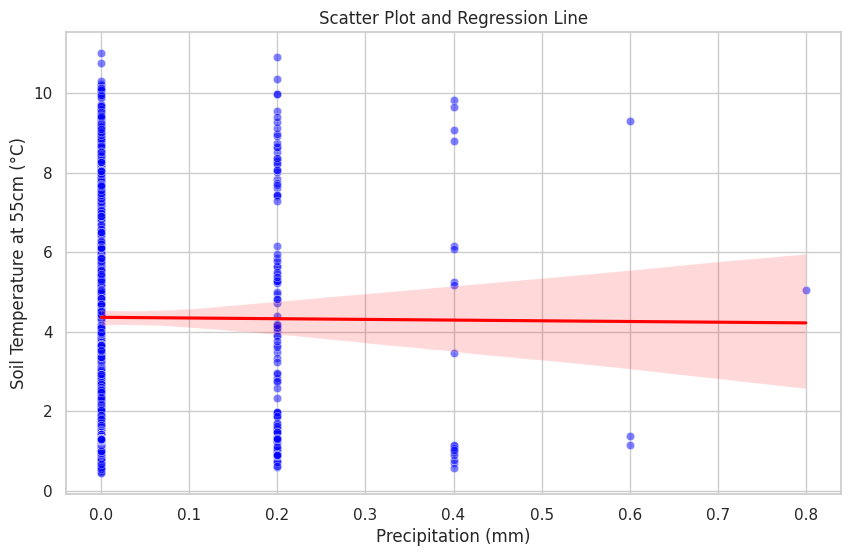

In [ ]:
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip_mm', y='soilTemp_sp1_55cm_degC', data=merged_data, color='blue', alpha=0.5)

# Regression line
sns.regplot(x='precip_mm', y='soilTemp_sp1_55cm_degC', data=merged_data, scatter=False, color='red')

plt.title('Scatter Plot and Regression Line')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Soil Temperature at 55cm (°C)')

In [ ]:
# Selecting variables for simple linear regression
merged_data_subset = merged_data[['soilTemp_sp1_55cm_degC', 'vwc_sp1_50cm_ccpercc']].dropna()  # Remove rows with missing values

# Define the dependent variable (y) and independent variable (X)
y = merged_data_subset['soilTemp_sp1_55cm_degC']
X = sm.add_constant(merged_data_subset['vwc_sp1_50cm_ccpercc'])

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     soilTemp_sp1_55cm_degC   R-squared:                       0.129
Model:                                OLS   Adj. R-squared:                  0.128
Method:                     Least Squares   F-statistic:                     163.3
Date:                    Sat, 16 Dec 2023   Prob (F-statistic):           5.70e-35
Time:                            02:01:28   Log-Likelihood:                -2707.6
No. Observations:                    1102   AIC:                             5419.
Df Residuals:                        1100   BIC:                             5429.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Text(0, 0.5, 'Soil Temperature at 55cm (°C)')

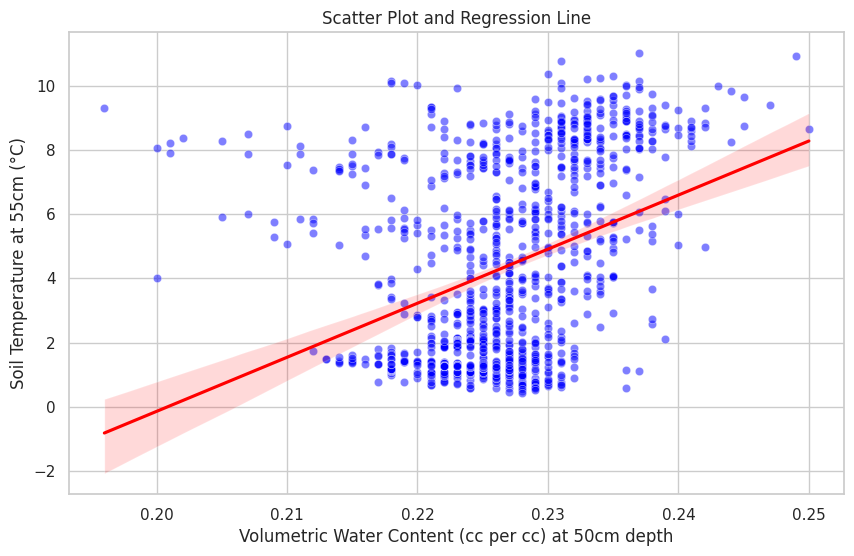

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vwc_sp1_50cm_ccpercc', y='soilTemp_sp1_55cm_degC', data=merged_data, color='blue', alpha=0.5)

# Regression line
sns.regplot(x='vwc_sp1_50cm_ccpercc', y='soilTemp_sp1_55cm_degC', data=merged_data, scatter=False, color='red')

plt.title('Scatter Plot and Regression Line')
plt.xlabel('Volumetric Water Content (cc per cc) at 50cm depth')
plt.ylabel('Soil Temperature at 55cm (°C)')

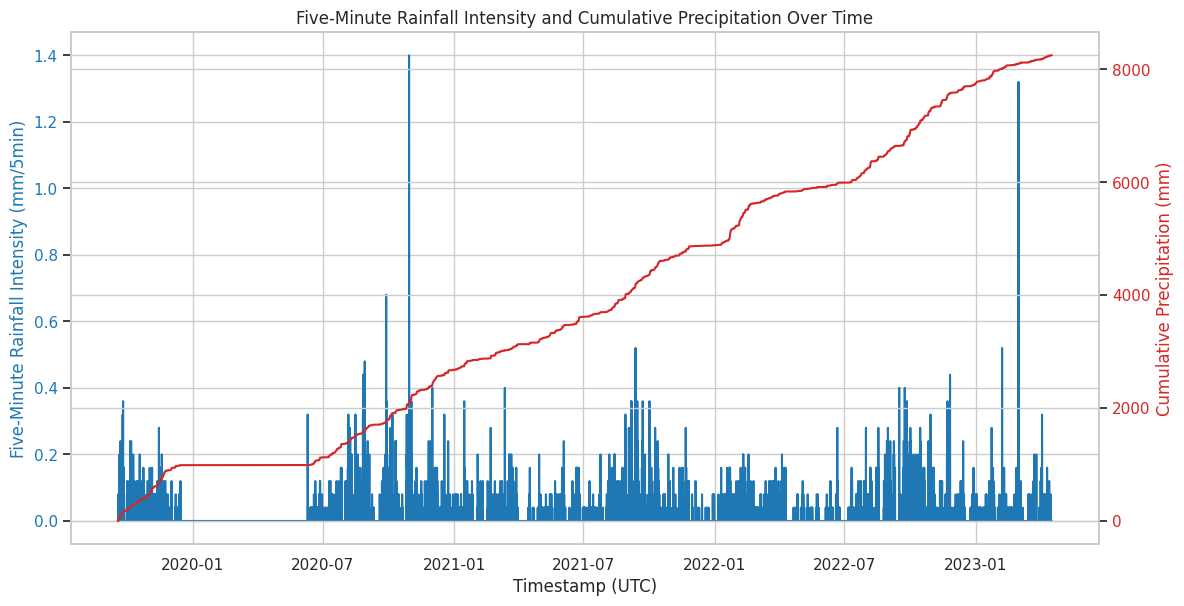

In [ ]:
landslide_data['timestamp_utc'] = pd.to_datetime(landslide_data['timestamp_utc'], format='%m/%d/%Y %H:%M:%S')

# Set 'timestamp_utc' as the index
landslide_data.set_index('timestamp_utc', inplace=True)

# Create a new column for five-minute rainfall intensity
landslide_data['precip_intensity'] = landslide_data['precip_mm'] / 5

# Create a new column for cumulative precipitation
landslide_data['cumulative_precip'] = landslide_data['precip_mm'].cumsum()

# Plot the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Five-Minute Rainfall Intensity on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp (UTC)')
ax1.set_ylabel('Five-Minute Rainfall Intensity (mm/5min)', color=color)
ax1.plot(landslide_data.index, landslide_data['precip_intensity'], color=color, label='Intensity')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot Cumulative Precipitation
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Precipitation (mm)', color=color)
ax2.plot(landslide_data.index, landslide_data['cumulative_precip'], color=color, label='Cumulative')
ax2.tick_params(axis='y', labelcolor=color)

# Display the graph
fig.tight_layout()
plt.title('Five-Minute Rainfall Intensity and Cumulative Precipitation Over Time')
plt.show()

Plots that display precipitation intensity and cumulative precipitation over time are essential. They provide insights into the rainfall patterns, which can significantly influence soil moisture and the likelihood of landslide initiation.

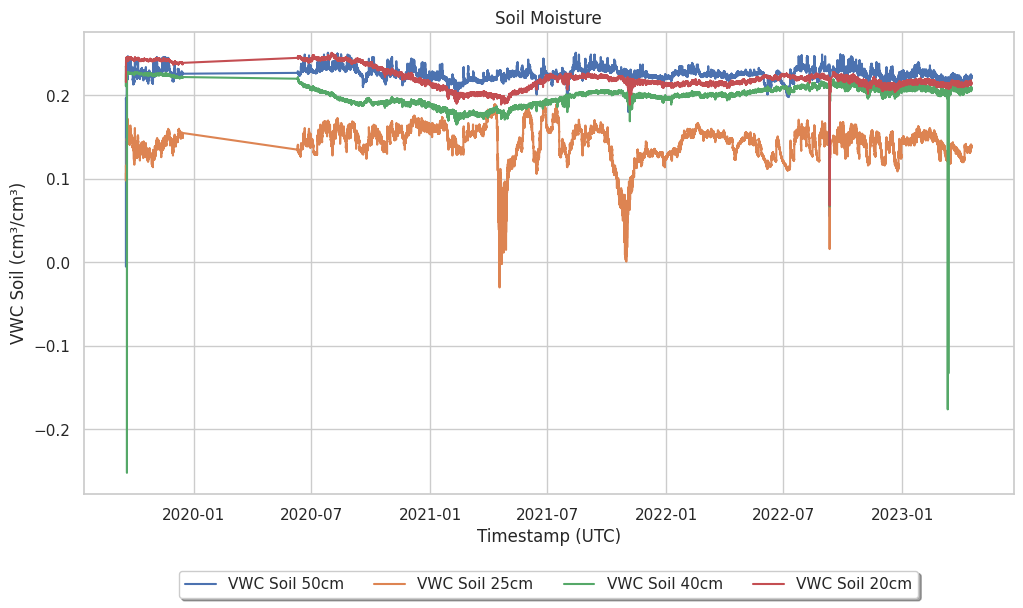

In [ ]:
# Extract columns related to VWC soil
vwc_columns = ['vwc_sp1_50cm_ccpercc', 'vwc_sp1_25cm_ccpercc', 'vwc_sp2_40cm_ccpercc', 'vwc_sp2_20cm_ccpercc']

# Plot the graph
fig, ax = plt.subplots(figsize=(12, 6))

# Set labels and title
legend_labels = ['VWC Soil 50cm', 'VWC Soil 25cm', 'VWC Soil 40cm', 'VWC Soil 20cm']
for i, column in enumerate(vwc_columns):
    ax.plot(landslide_data.index, landslide_data[column], label=legend_labels[i])
ax.set_xlabel('Timestamp (UTC)')
ax.set_ylabel('VWC Soil (cm\N{SUPERSCRIPT THREE}/cm\N{SUPERSCRIPT THREE})')
plt.title('Soil Moisture')

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(vwc_columns))

# Display the graph
plt.show()

The graphs showing volumetric water content (VWC) at different soil depths are directly relevant to the study of landslide occurrences as they reflect the moisture levels within the soil, which is a critical factor in slope stability.

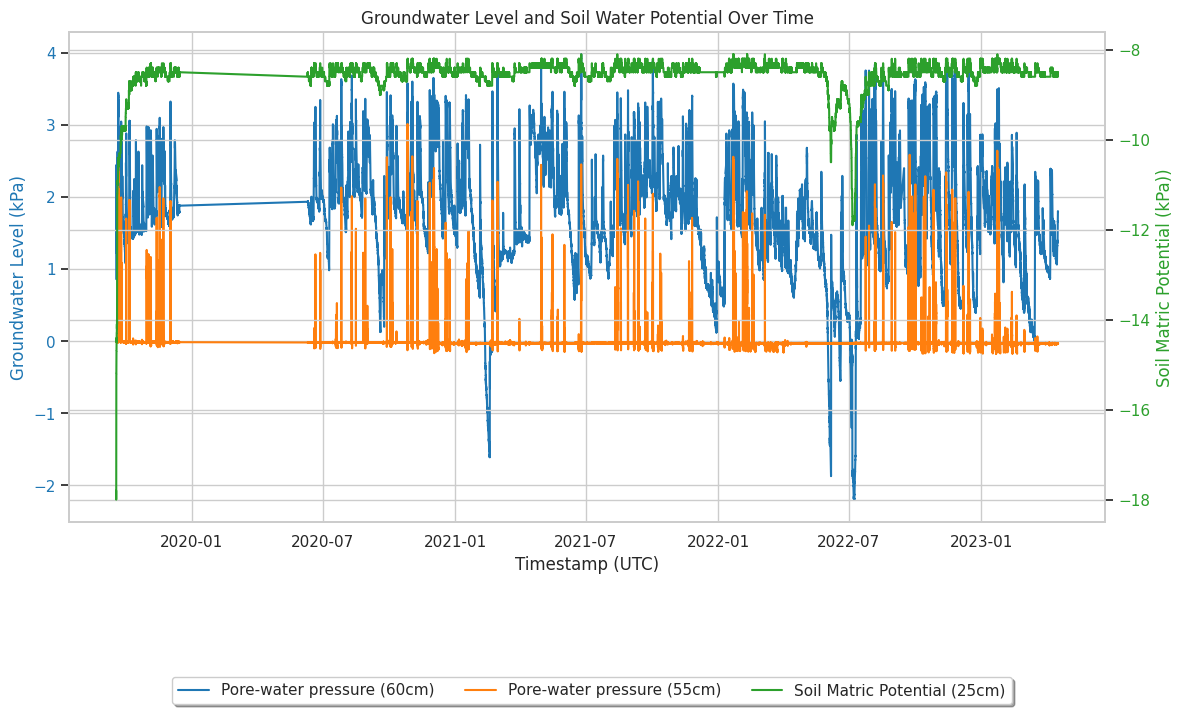

In [ ]:
# Extract columns related to Groundwater Level
pwp_column1 = 'pwp_sp2_60cm_kPa'
pwp_column2 = 'pwp_sp1_55cm_kPa'
mp_column = 'mp_sp1_25cm_kPa'

# Convert 'pwp_sp1_55cm_kPa' column to numeric, handling errors and converting to NaN
landslide_data[pwp_column2] = pd.to_numeric(landslide_data[pwp_column2], errors='coerce')

# Remove NaN values
landslide_data = landslide_data.dropna(subset=[pwp_column1, pwp_column2, mp_column])

# Plot the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Groundwater Level (pwp) on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Timestamp (UTC)')
ax1.set_ylabel('Groundwater Level (kPa)', color=color1)
ax1.plot(landslide_data.index, landslide_data[pwp_column1], color=color1, label='Pore-water pressure (60cm)')
ax1.plot(landslide_data.index, landslide_data[pwp_column2], color='tab:orange', label='Pore-water pressure (55cm)')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for Soil Water Potential (mp_sp1_25cm_kPa)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Soil Matric Potential (kPa))', color=color2)
ax2.plot(landslide_data.index, landslide_data[mp_column], color=color2, label='Soil Matric Potential (25cm)')
ax2.tick_params(axis='y', labelcolor=color2)

# Set title
plt.title('Groundwater Level and Soil Water Potential Over Time')

# Add legend below the graph
fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Display the graph
plt.show()

These are crucial as they show the hydrological forces within the soil, which can lead to an increase in pore-water pressure, a key factor in slope failure.



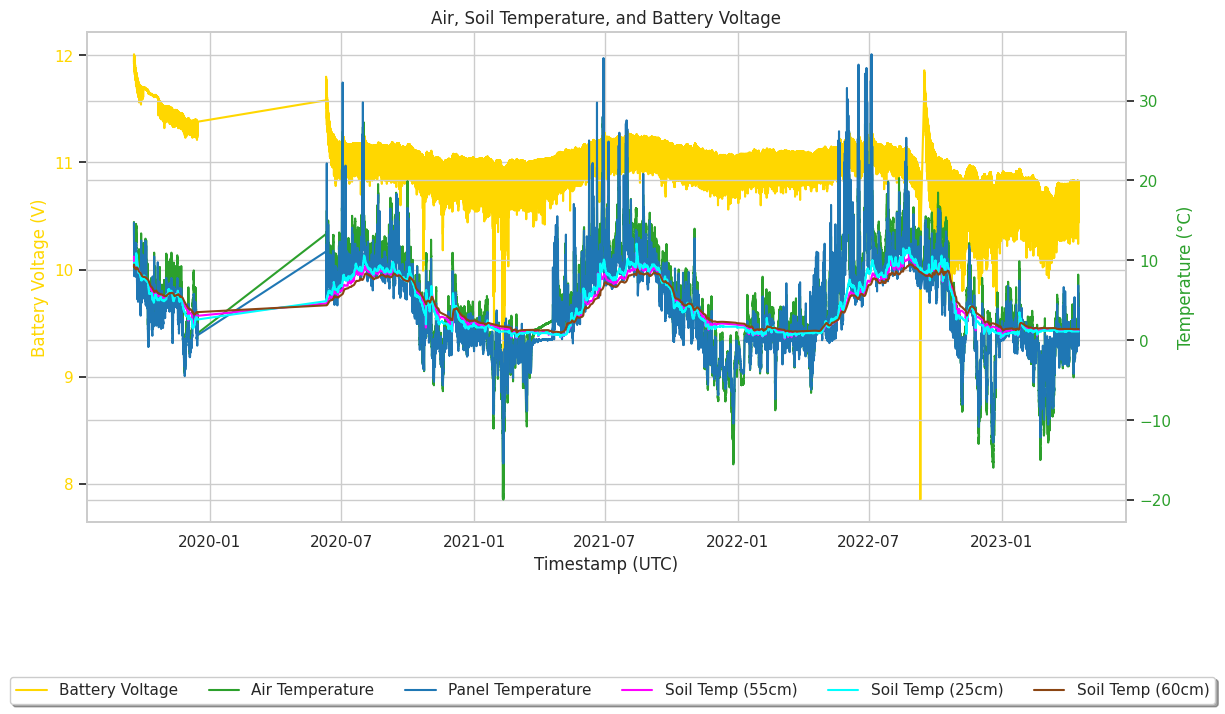

In [ ]:
# Extract relevant columns
air_temp_column = 'airTemp_degC'
panel_temp_column = 'panelTemp_degC'
sp155_temp_column = 'soilTemp_sp1_55cm_degC'
sp125_temp_column = 'soilTemp_sp1_25cm_degC'
sp260_temp_column = 'soilTemp_sp2_60cm_degC'
battery_voltage_column = 'battery_V'

# Convert column to numeric, handling errors and converting to NaN
landslide_data[sp155_temp_column] = pd.to_numeric(landslide_data[sp155_temp_column], errors='coerce')
landslide_data[sp125_temp_column] = pd.to_numeric(landslide_data[sp125_temp_column], errors='coerce')
landslide_data[sp260_temp_column] = pd.to_numeric(landslide_data[sp260_temp_column], errors='coerce')

# Remove NaN values
landslide_data = landslide_data.dropna(subset=[sp155_temp_column, sp125_temp_column, sp260_temp_column])

# Plot the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Battery Voltage on the left y-axis (yellow)
color1 = '#FFD700'
ax1.set_xlabel('Timestamp (UTC)')
ax1.set_ylabel('Battery Voltage (V)', color=color1)
ax1.plot(landslide_data.index, landslide_data[battery_voltage_column], color=color1, label='Battery Voltage')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for Temperature (degree Celsius)
ax2 = ax1.twinx()

# Plot Air Temp (green)
color2 = 'tab:green'
ax2.set_ylabel('Temperature (°C)', color=color2)
ax2.plot(landslide_data.index, landslide_data[air_temp_column], color=color2, label='Air Temperature')

# Plot Panel Temp (blue)
color3 = 'tab:blue'
ax2.plot(landslide_data.index, landslide_data[panel_temp_column], color=color3, label='Panel Temperature')

# Plot Soil Temp (sp155, magenta; sp125, cyan; sp260, brown)
color4 = '#FF00FF'
ax2.plot(landslide_data.index, landslide_data[sp155_temp_column], color=color4, label='Soil Temp (55cm)')
color5 = '#00FFFF'
ax2.plot(landslide_data.index, landslide_data[sp125_temp_column], color=color5, label='Soil Temp (25cm)')
color6 = '#8B4513'
ax2.plot(landslide_data.index, landslide_data[sp260_temp_column], color=color6, label='Soil Temp (60cm)')


ax2.tick_params(axis='y', labelcolor=color2)

# Set title
plt.title('Air, Soil Temperature, and Battery Voltage')

# Add legend below the graph
fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=6)

# Display the graph
plt.show()

These are relevant to understanding the thermal state of the soil, which can affect its mechanical properties and moisture content. The temperatures can influence the evaporation rates, soil strength, and may contribute to the triggering of landslides, especially if there are freeze-thaw cycles.



While battery voltage might not seem directly related to landslide risk, it could be included to demonstrate the reliability of the data collection equipment over the study period. If battery voltage shows significant drops, it might indicate potential data gaps or inaccuracies.

# Results

## Key Variables for Landslide Initiation:

1. Precipitation (precip_mm): Intense and prolonged rainfall can increase soil moisture to critical levels, leading to a loss of cohesion and the initiation of a landslide. The "Time Series Plot of Precipitation in Landslide Data" and "Five-Minute Rainfall Intensity and Cumulative Precipitation Over Time" graphs provide insights into the rainfall events over the period of study.

2. Soil Moisture Content (vwc_sp1_50cm_ccpercc, vwc_sp1_25cm_ccpercc, vwc_sp2_40cm_ccpercc, vwc_sp2_20cm_ccpercc): Soil moisture content is a direct indicator of the potential for landslide initiation. The higher the water content, the lower the soil strength. The "Soil Moisture" graph shows the volumetric water content at various soil depths.

3. Soil Water Potential (pwp_sp1_55cm_kPa, pwp_sp2_60cm_kPa): This measures the energy state of the water in the soil and is related to the force that retains water in the soil. High positive values indicate dry soil, while negative values indicate saturated conditions. The "Groundwater Level and Soil Water Potential Over Time" graph illustrates these measurements.

4. Soil Temperature (soilTemp_sp1_55cm_degC, soilTemp_sp2_60cm_degC, soilTemp_sp1_25cm_degC): Temperature can affect the water holding capacity of soil and its mechanical properties. The "Air, Soil Temperature, and Battery Voltage" graph, as well as the scatter plot showing soil temperature at 55cm depth against volumetric water content.

5. Air Temperature (airTemp_degC): This can influence evapotranspiration rates, thus affecting soil moisture levels.

6. Battery Voltage (battery_V) and Panel Temperature (panelTemp_degC): These may serve as proxy indicators of equipment health and environmental conditions, respectively, which could indirectly affect the measurement reliability.

## Analysis and Findings for Sitka (2020-2023):




*   The data does not show extreme precipitation events that would likely exceed the thresholds for landslide initiation. While there are spikes in rainfall intensity, these do not appear sustained enough to cause widespread soil saturation to critical levels.
*   Soil moisture content remains relatively stable and does not show sustained levels that would indicate a high risk of landslide due to soil saturation.
*   Soil water potential values fluctuate but do not suggest prolonged periods of saturation that would be necessary to trigger landslides.
*   The temperature data, both air and soil, do not show extreme variations that would indicate significant changes in soil moisture through freeze-thaw cycles or evapotranspiration that could destabilize slopes.
*   Equipment health indicators (battery voltage and panel temperature) suggest the data is reliable.

In conclusion, based on the provided datasets and graphs, it appears that key thresholds for landslide initiation, particularly those related to prolonged soil saturation from excessive rainfall, were not crossed in Sitka, Alaska from 2020 through 2023.